In [1]:
import sys
import os

# Append the directory of the module to the Python path
sys.path.append("/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit")

In [2]:
from cell import Cell
from link_composer import LinkComposer
import cells_extractor 
import visualizer
import link_algorithm
from cell_event import CellEvent, CellDefine, Cell


In [3]:
composer = LinkComposer.read_folder(mask_folder="/Users/sherryyang/Documents/wiggins-lab/data/f/masks/*.png", phase_folder="/Users/sherryyang/Documents/wiggins-lab/data/f/phase/*.tif")

Frame:7, Mask label:1. Pixels number = 2. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:11, Mask label:46. Pixels number = 1. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:13, Mask label:1. Pixels number = 1. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:22, Mask label:26. Pixels number = 2. cannot make polygon. A linearring requires at least 4 coordinates.


In [4]:
import pandas as pd

G = composer.make_new_dircted_graph()

In [5]:
composer_bad = LinkComposer.read_folder(mask_folder="/Users/sherryyang/Documents/wiggins-lab/data/1107/xy0/masks/*.png", phase_folder="/Users/sherryyang/Documents/wiggins-lab/data/1107/xy0/phase/*.tif")

Frame:5, Mask label:4. Pixels number = 20. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:6, Mask label:18. Pixels number = 21. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:6, Mask label:21. Pixels number = 60. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:10, Mask label:7. Pixels number = 54. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:10, Mask label:13. Pixels number = 28. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:11, Mask label:52. Pixels number = 3456. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:30, Mask label:183. Pixels number = 279. cannot make polygon. A linearring requires at least 4 coordinates.


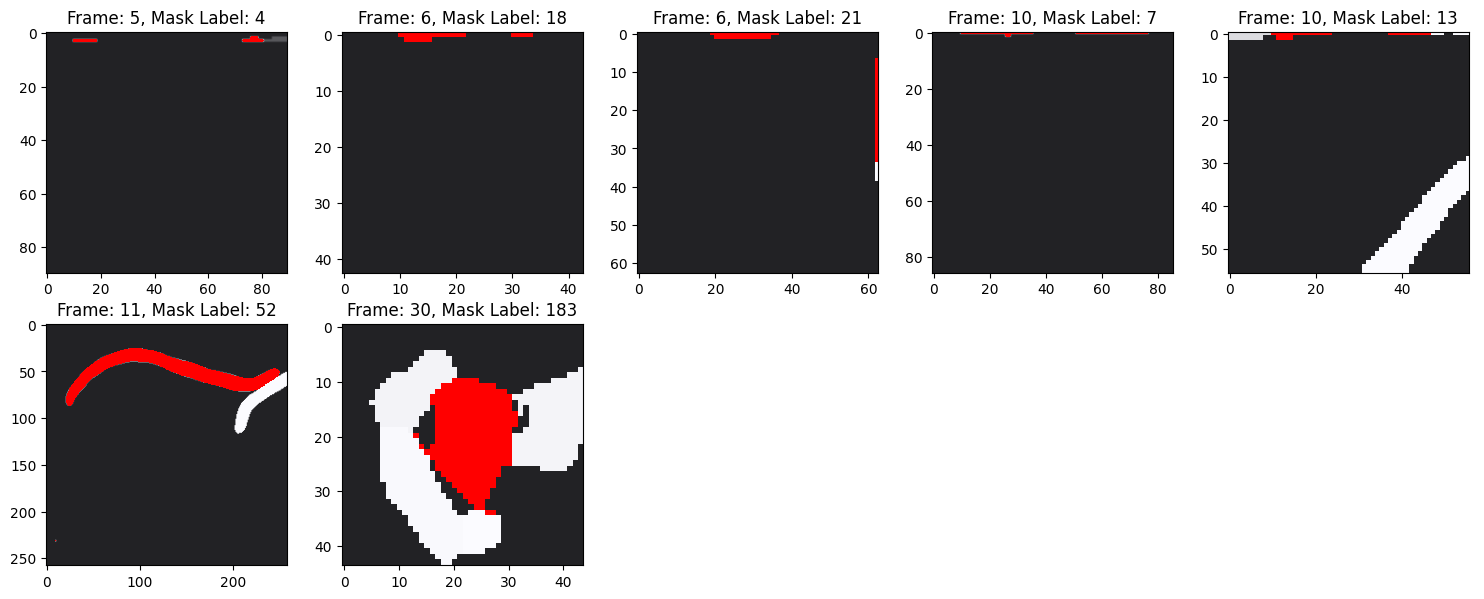

In [6]:
composer_bad.show_mask_error()

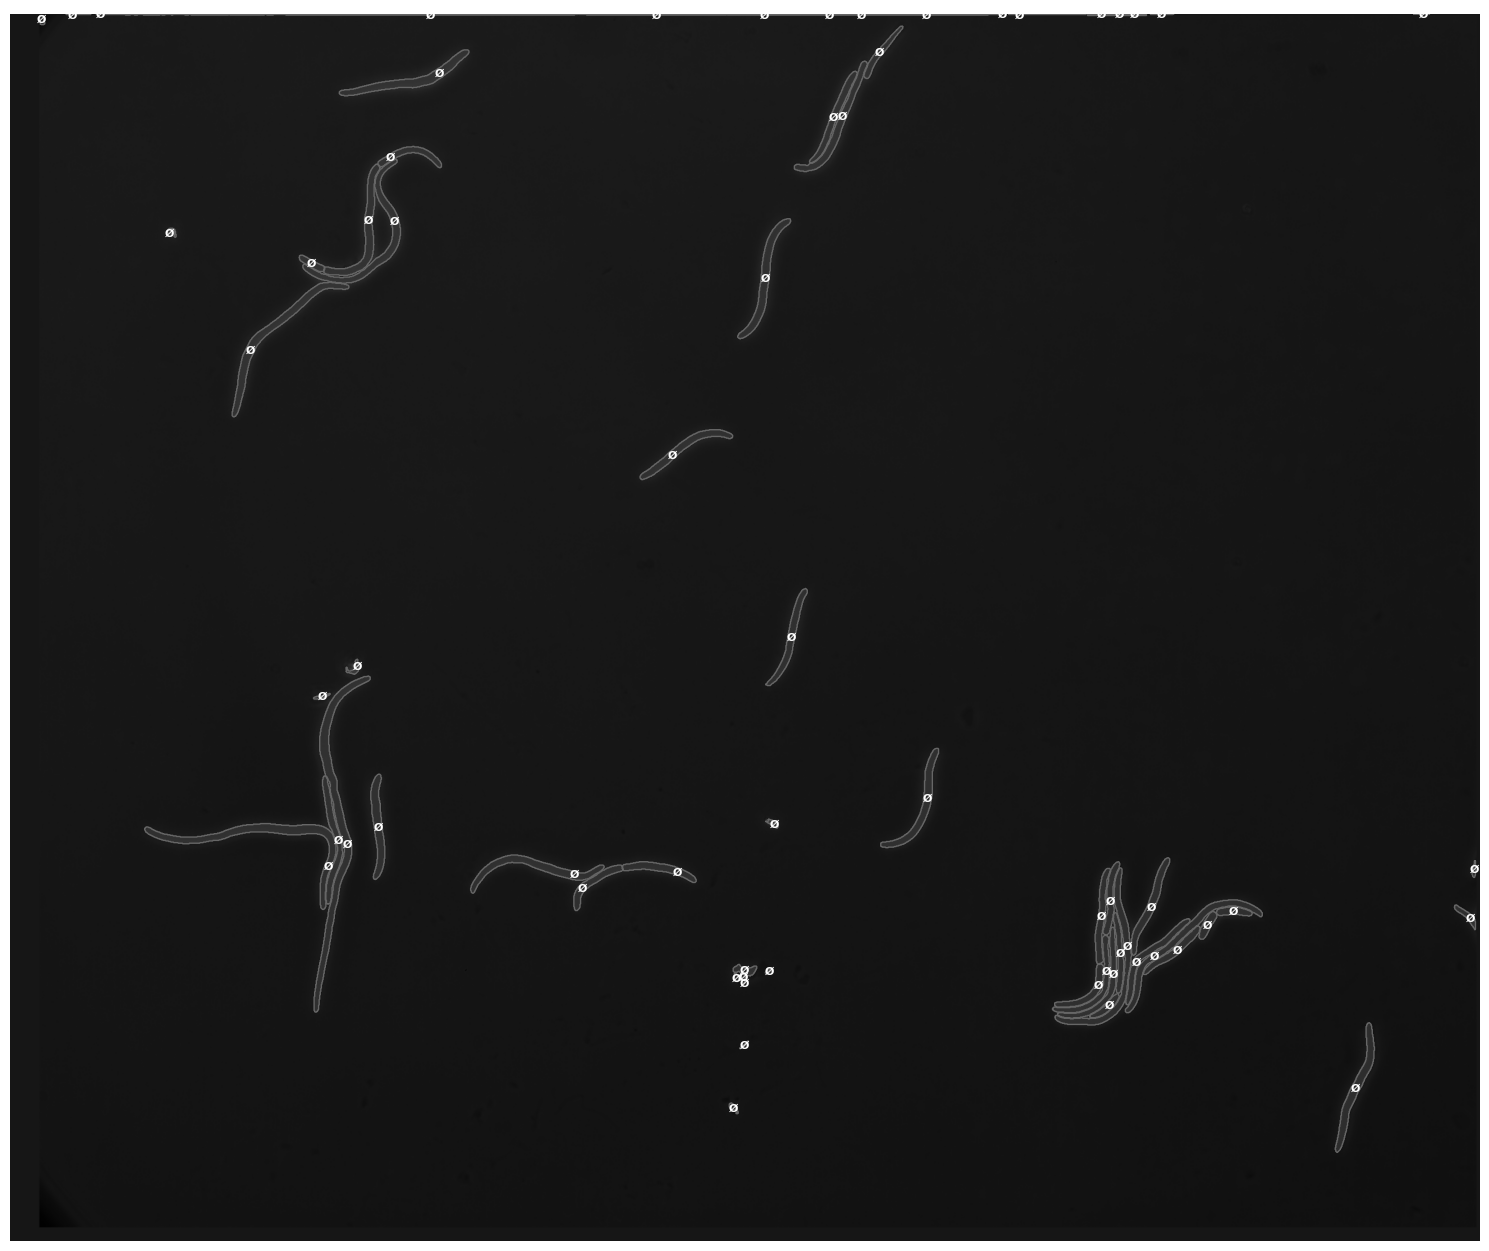

In [8]:
G = composer_bad.make_new_dircted_graph()
label_info = visualizer.get_label_info(G)
# show phase image of an empty graph
composer_bad.show_frame_phase(G = G, frame = 12, info = label_info, circle_label=True, figsize = (15,15), representative_point=True)

In [39]:
area = []
poa = []
error = []
error_cells = {}
for cell in composer_bad.cells:
    area.append(cell.polygon.area)
    poa_current = cell.polygon.length * 1.0 / cell.polygon.area
    poa.append(poa_current)
    if poa_current > 0.5:
        error.append([cell.frame, cell.label])
        error_cells[cell] = ("!", "#FF0000")
        
    

In [40]:
len(error_cells)

357

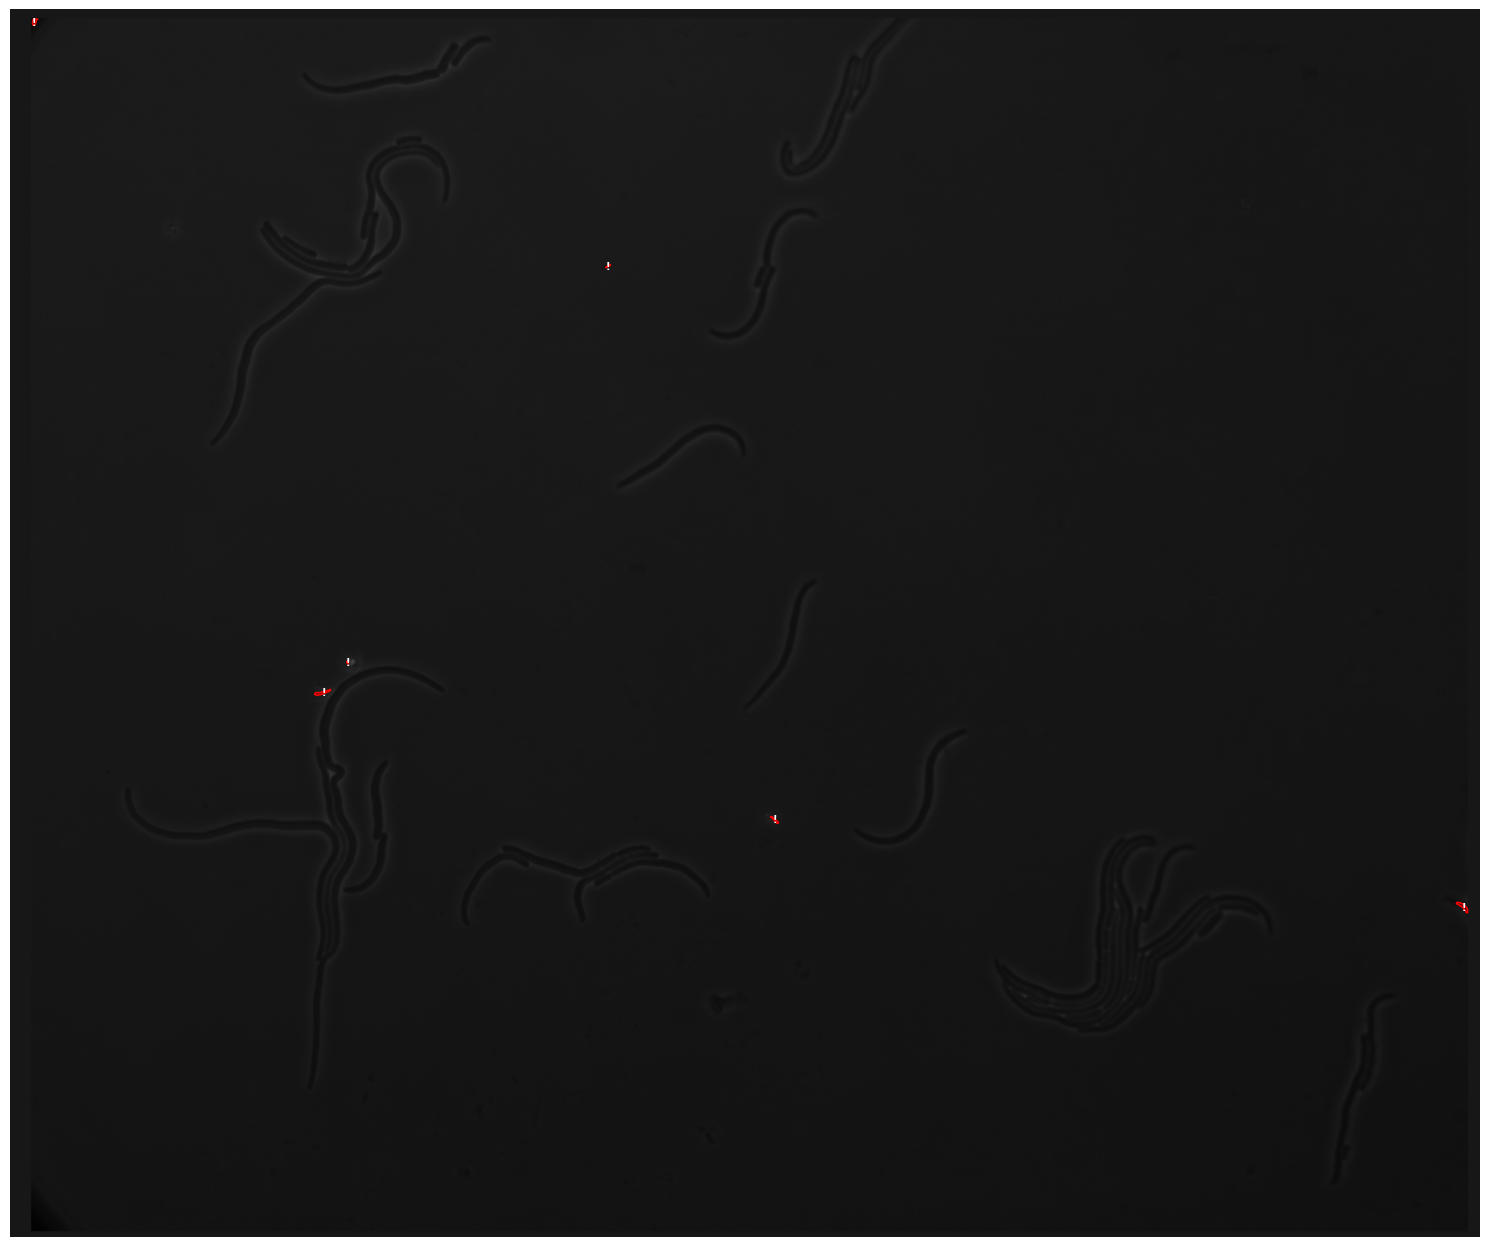

In [41]:
frame = 20
image = composer_bad.get_single_frame_phase(frame)
visualizer.plot_single_frame_phase( G=G, image=image, cells_frame_dict=composer_bad.cells_frame_dict, frame=frame, info=error_cells, fontsize=7, figsize=(15,15), representative_point=True)
   

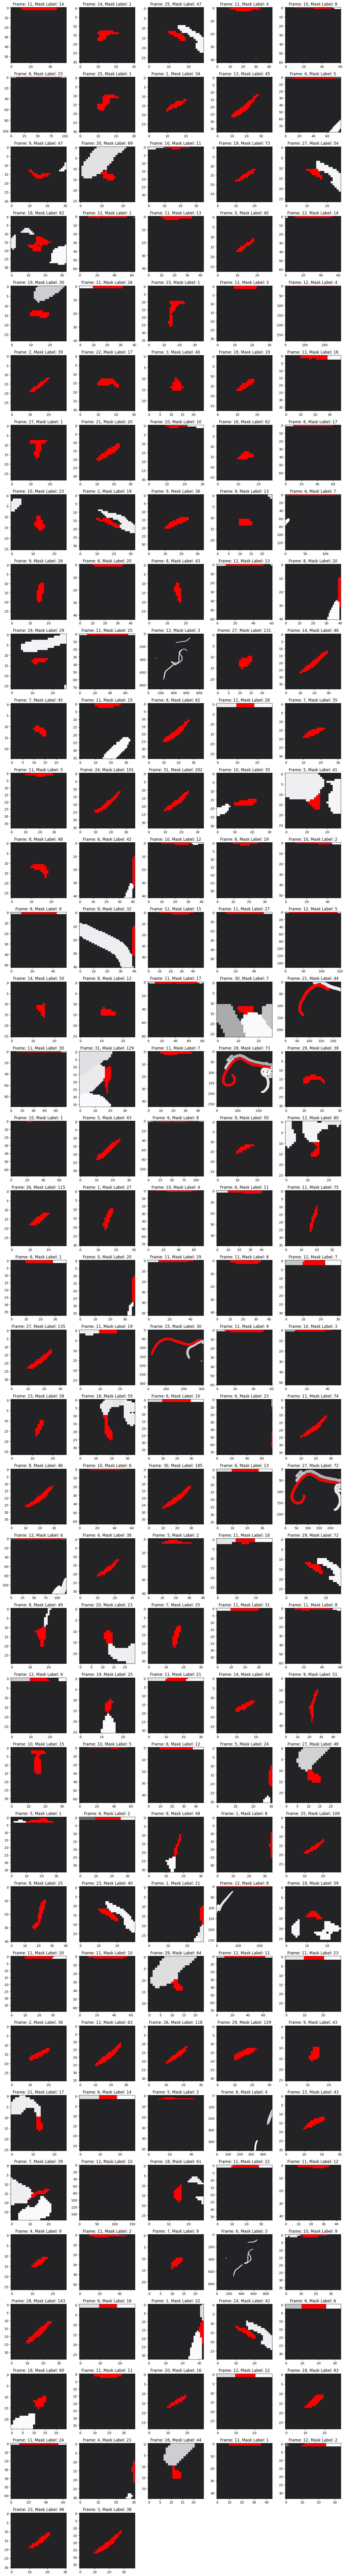

In [9]:
masks = cells_extractor.get_mask_dict(composer_bad.mask_folder)
visualizer.plot_error_masks(mask=masks, error=error)

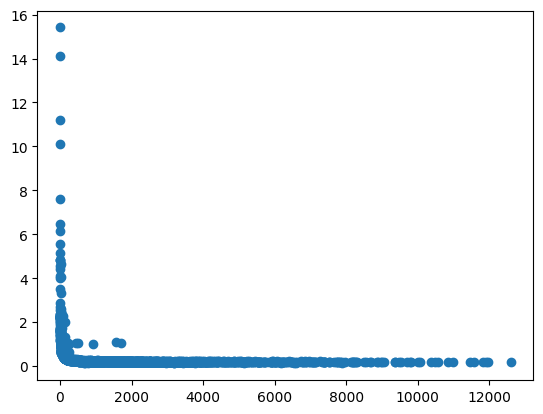

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(area, poa)
plt.show()

In [44]:
from PIL import Image

# Replace with your image paths
image1 = Image.open('/Users/sherryyang/Downloads/ImageProcessing-Benchmarking-main/ground-truth/tracking-ground-truth/W02/timeStep t = 25.png')
image2 = Image.open('/Users/sherryyang/Downloads/ImageProcessing-Benchmarking-main/ground-truth/tracking-ground-truth/W02/timeStep t = 26.png')

# Create and save the GIF
image1.save('output.gif', save_all=True, append_images=[image2], duration=500, loop=0)


In [4]:
mask_folder = "/Users/sherryyang/Documents/wiggins-lab/data/1119/xy5/masks/*.png"
phase_folder = "/Users/sherryyang/Documents/wiggins-lab/data/1119/xy5/phase/*c1.tif"
composer = LinkComposer.read_folder(mask_folder=mask_folder, phase_folder=phase_folder)

In [44]:
import numpy as np
import networkx as nx
import sys

G = nx.Graph(composer.cells)

dict = composer.cells_frame_dict
sorted_frame = sorted(dict)



for i in range(1, len(sorted_frame)):
    source_cells = list(dict[sorted_frame[i-1]])
    target_cells =  list(dict[sorted_frame[i]])

    source_cells.sort()
    target_cells.sort()

    source_dim = len(source_cells)
    target_dim = len(target_cells)

    array_cost = np.ones((source_dim + 1, target_dim + 1))
    array_choice = np.zeros((source_dim + 1, target_dim + 1))
    best_choice = np.zeros((source_dim + 1, target_dim + 1))

    array_cost[-1, :] = 5
    array_cost[:, -1] = 5

    sub_G = nx.DiGraph()
    for i in range(source_dim):
        for j in range(target_dim):
            source_cell = source_cell[i]
            target_cell = target_cells[j]

            intersection_area = source_cell.polygon.intersection(target_cell.polygon).area
            if area > 0:
                union_area = source_cell.polygon.union(target_cell.polygon).area
                weight = -1 * intersection_area * 1.0 /  union_area  + 1
                sub_G.add(source_cell, target_cell, weight=weight)

                array_cost[i][j] = weight
   

    link_helper(0, array_cost, array_choice, sys.maxsize, best_choice)



IndentationError: unexpected indent (2518665311.py, line 2)

In [5]:
import numpy as np
import networkx as nx
import sys

In [247]:
G = composer.make_new_dircted_graph()

In [330]:
i = 28

dict = composer.cells_frame_dict
sorted_frame = sorted(dict)


source_cells = list(dict[sorted_frame[i-1]])
target_cells =  list(dict[sorted_frame[i]])

source_cells.sort()
target_cells.sort()

source_dim = len(source_cells)
target_dim = len(target_cells)

array_cost = np.ones((source_dim , target_dim)) * -1 
array_choice = np.zeros((source_dim, target_dim))
best_choice = np.zeros((source_dim, target_dim))

sub_G = nx.Graph()
for i in range(source_dim):
    for j in range(target_dim):
        source_cell = source_cells[i]
        target_cell = target_cells[j]

        intersection_area = source_cell.polygon.intersection(target_cell.polygon).area
        if intersection_area > 0:
            union_area = source_cell.polygon.union(target_cell.polygon).area
            weight = -1 * intersection_area /  union_area  + 1
            sub_G.add_edge(source_cell, target_cell, weight=weight)

            array_cost[i][j] = weight

In [99]:
nx.number_connected_components(sub_G)

27

In [311]:
components = nx.connected_components(sub_G)

# Create a list to store each subgraph
subgraphs = []

for nodes in components:
    subgraph = sub_G.subgraph(nodes).copy()
    subgraphs.append(subgraph)
    

In [267]:
components = nx.connected_components(special_subgraph)

# Create a list to store each subgraph
subgraphs = []

for nodes in components:
    subgraph = special_subgraph.subgraph(nodes).copy()
    subgraphs.append(subgraph)

In [262]:

for graph in subgraphs:
    if len(graph.edges()) == 120:
        special_subgraph = graph

In [132]:
special_subgraph

In [275]:
import random
random.seed(119)
label_info = {}
for i in range(len(subgraphs)):
    for cell in subgraphs[i].nodes():
        color = visualizer.new_color(random.random())
        label_info[cell] = ("", color)

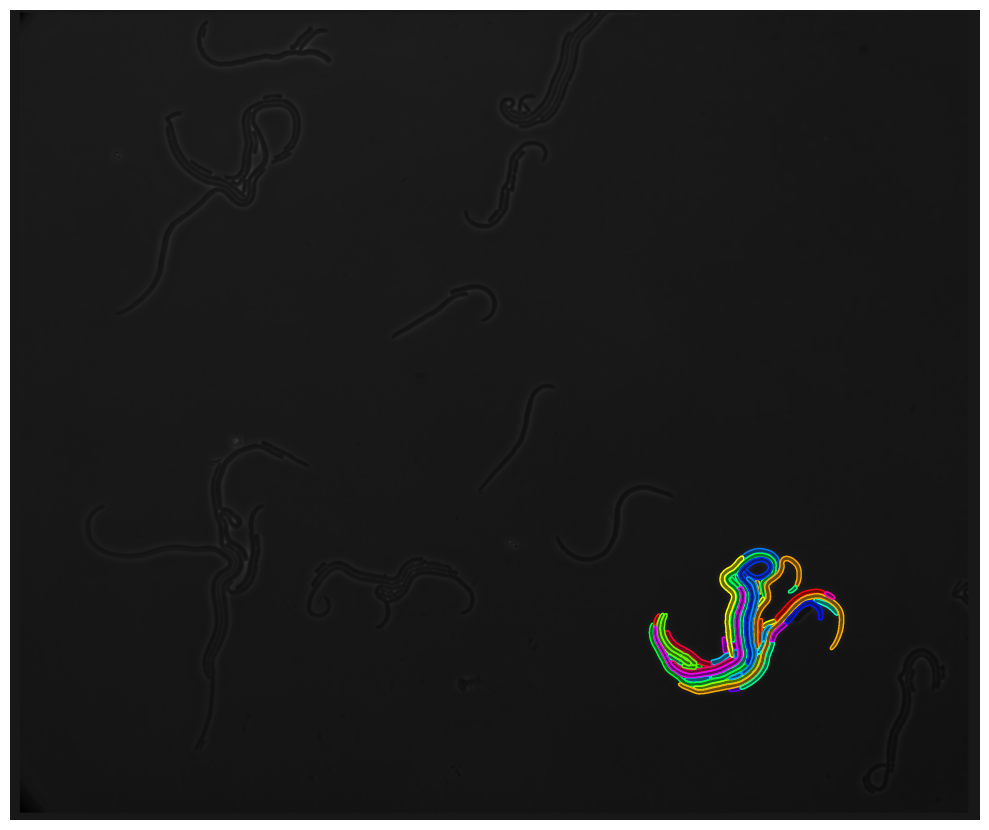

In [276]:
composer.show_frame_phase(G = G, frame = 28, info = label_info, circle_label=True, figsize = (10,10), representative_point=True)

In [264]:
import networkx as nx
import sys

def cut_graph(G):
    for u, v in G.edges():
        G[u][v]['reliability'] = sys.maxsize

    for node in G.nodes():
        edges_with_weights = G.edges(node, data='weight')
        sorted_edges = sorted(edges_with_weights, key=lambda x: x[2])
        for i, (u, v, weight) in enumerate(sorted_edges):
            G[u][v]['reliability'] = min(i, G[u][v]['reliability'])

    edges_with_rel=  G.edges(data='reliability')
    sorted_edges = sorted(edges_with_rel, key=lambda x: x[2], reverse=True)
    index = 0

    while nx.is_connected(G):
        u,v, realiability_target = sorted_edges[index]
        realiability = realiability_target
        while realiability == realiability_target:
            index += 1
            G.remove_edge(u, v)
            u,v, realiability_target = sorted_edges[index]

    return G



In [255]:
nx.is_connected(special_subgraph)

False

In [256]:
nx.number_connected_components(special_subgraph)

3

In [266]:
len(special_subgraph.edges())

42

In [279]:
sorted_edges[index]

(Cell: frame_27, label_105, <-0x65e620c5d6ea83fe>,
 Cell: frame_28, label_117, <-0x6fa9a5f94b9f4da1>,
 0)

In [152]:
realiability

1

In [148]:
len(sorted_edges)

120

In [155]:
len(special_subgraph.nodes())

78

In [ ]:
from queue import Queue

queue = Queue()
queue.put('item1')  # Enqueue
queue.put('item2')
item = queue.get()  # Dequeue



In [102]:
2 ** 120

1329227995784915872903807060280344576

In [ ]:
for subgraph in subgraphs:
    def()


def find_edges(graph, edge, test_graph):
    


In [9]:
np.sum(array_cost != -1)

41

In [283]:
def cut_graph(G):
    for u, v in G.edges():
        G[u][v]['reliability'] = sys.maxsize

    for node in G.nodes():
        edges_with_weights = G.edges(node, data='weight')
        sorted_edges = sorted(edges_with_weights, key=lambda x: x[2])
        for i, (u, v, weight) in enumerate(sorted_edges):
            G[u][v]['reliability'] = min(i, G[u][v]['reliability'])

    edges_with_rel=  G.edges(data='reliability')
    sorted_edges = sorted(edges_with_rel, key=lambda x: x[2], reverse=True)
    index = 0

    while nx.is_connected(G):
        u,v, realiability_target = sorted_edges[index]
        realiability = realiability_target
        while realiability == realiability_target:
            index += 1
            G.remove_edge(u, v)
            u,v, realiability_target = sorted_edges[index]

    return G

In [362]:
def link_subtree(G):
    all_edges = set(G.edges(data='weight'))
    test_G = nx.Graph()
    edges = set()
    for u, v, weight in all_edges:
        if G.degree(u) == 1 or G.degree(v) == 1:
            test_G.add_edge(u,v, weight = 0)
        else:
            edges.add((u,v, weight))

    edges = list(edges)
    test_G.add_nodes_from(G.nodes())

    min_cost = sys.maxsize
    min_tree = nx.Graph()

    min_cost, min_tree = link_subtree_helper(0, edges, test_G, min_cost, min_tree)
    return min_cost, min_tree



def link_subtree_helper(index, edges, test_G, min_cost, min_tree):
    if index == len(edges):
        cost = sum(weight for _, _, weight in test_G.edges(data='weight'))
        cost += len(list(nx.isolates(test_G))) * 10
        if cost < min_cost:
            min_cost = cost
            min_tree = test_G.copy()
        return min_cost, min_tree

    u, v, weight = edges[index]

    min_cost, min_tree = link_subtree_helper(index + 1, edges, test_G, min_cost, min_tree)
    if (test_G.degree(u) <= 1) or (test_G.degree(v) <= 1):
        test_G.add_edge(u, v, weight=weight)
        min_cost, min_tree = link_subtree_helper(index + 1, edges, test_G, min_cost, min_tree)
        test_G.remove_edge(u, v)

    return min_cost, min_tree


In [360]:
from queue import Queue

queue = Queue()
queue.put(sub_G)

tree_set = set()
while not queue.empty():
    sub_G = queue.get()
    components = nx.connected_components(sub_G)
    subgraphs = []
    for nodes in components:
        subgraph = sub_G.subgraph(nodes).copy()
        if len(subgraph.edges()) < 20:
            min_cost, min_tree = link_subtree(subgraph)
            tree_set.add(min_tree)
        else:
            subgraph = cut_graph(subgraph)
            queue.put(subgraph)
    

3.354562611768313
3.354562611768313
1.135690973809972
1.135690973809972


In [363]:
tree_set = set()

for frame in range(1,composer.frame_num):

    dict = composer.cells_frame_dict
    sorted_frame = sorted(dict)

    source_cells = list(dict[sorted_frame[frame-1]])
    target_cells =  list(dict[sorted_frame[frame]])

    source_cells.sort()
    target_cells.sort()

    source_dim = len(source_cells)
    target_dim = len(target_cells)

    sub_G = nx.Graph()
    for i in range(source_dim):
        for j in range(target_dim):
            source_cell = source_cells[i]
            target_cell = target_cells[j]

            intersection_area = source_cell.polygon.intersection(target_cell.polygon).area
            if intersection_area > 0:
                union_area = source_cell.polygon.union(target_cell.polygon).area
                weight = -1 * intersection_area /  union_area  + 1
                sub_G.add_edge(source_cell, target_cell, weight=weight)

    
    queue = Queue()
    queue.put(sub_G)

    while not queue.empty():
        sub_G = queue.get()
        components = nx.connected_components(sub_G)
        subgraphs = []
        for nodes in components:
            subgraph = sub_G.subgraph(nodes).copy()
            if len(subgraph.edges()) < 20:
                min_cost, min_tree = link_subtree(subgraph)
                tree_set.add(min_tree)
            else:
                subgraph = cut_graph(subgraph)
                queue.put(subgraph)
        


In [356]:
G = composer.make_new_dircted_graph()
for graph in tree_set:
    for u, v in graph.edges():
        if u < v:
            G.add_edge(u,v)
        else:
            G.add_edge(v,u)

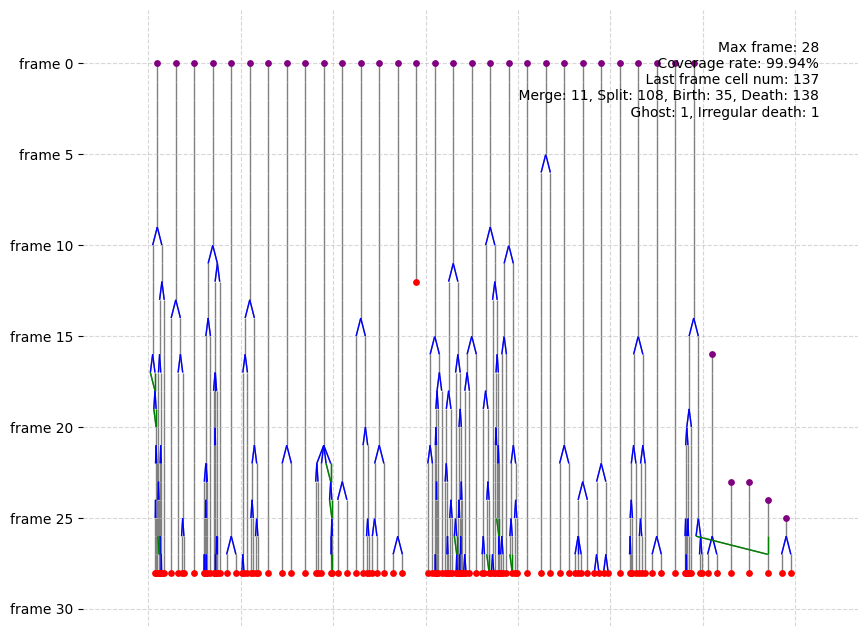

In [364]:
visualizer.quick_lineage(G)

In [309]:
components = nx.connected_components(G)
for nodes in components:
    subgraph = sub_G.subgraph(nodes).copy()
    if len(subgraph.edges()) < 20:
        min_cost, min_tree = link_subtree(subgraph)
        #print(min_cost)

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
1

In [298]:
components

<generator object connected_components at 0x14ed6fa00>

In [294]:
len(tree_set)


1621

In [325]:
def link_subtree(G):
    all_edges = set(G.edges(data='weight'))
    test_G = nx.Graph()
    edges = set()
    for u, v, weight in all_edges:
        if G.degree(u) == 1 or G.degree(v) == 1:
            test_G.add_edge(u,v, weight = 0)
        else:
            edges.add((u,v, weight))

    edges = list(edges)
    test_G.add_nodes_from(G.nodes())

    min_cost = sys.maxsize
    min_tree = nx.Graph()

    min_cost, min_tree = link_subtree_helper(0, edges, test_G, min_cost, min_tree)
    print(min_cost)
    return min_cost, min_tree



def link_subtree_helper(index, edges, test_G, min_cost, min_tree):
    if index == len(edges):
        cost = sum(weight for _, _, weight in test_G.edges(data='weight'))
        cost += len(list(nx.isolates(test_G))) * 10
        if cost < min_cost:
            print(cost)
            min_cost = cost
            min_tree = test_G.copy()
        return min_cost, min_tree

    u, v, weight = edges[index]

    min_cost, min_tree = link_subtree_helper(index + 1, edges, test_G, min_cost, min_tree)
    if (test_G.degree(u) <= 1) or (test_G.degree(v) <= 1):
        test_G.add_edge(u, v, weight=weight)
        min_cost, min_tree = link_subtree_helper(index + 1, edges, test_G, min_cost, min_tree)
        test_G.remove_edge(u, v)

    return min_cost, min_tree


In [212]:
len(subgraphs[0].edges)

19

In [213]:
len(subgraphs[0].nodes)

17

In [328]:
G.edges()

EdgeView([])

In [326]:
link_subtree(subgraphs,e)

10
10


(10, <networkx.classes.graph.Graph at 0x14f353f40>)

In [233]:
len(subgraphs[0].edges())

86

In [236]:
G = subgraphs[0]

all_edges = set(G.edges(data='weight'))
test_G = nx.Graph()
edges = set()
for u, v, weight in all_edges:
    if G.degree(u) == 1 or G.degree(v) == 1:
        test_G.add_edge(u,v, weight = 0)
    else:
        edges.add((u,v, weight))

edges = list(edges)

In [239]:
len(subgraphs[0].nodes())

76

In [240]:
3 ** 30

205891132094649

In [208]:
min_tree.edges()

EdgeView([(Cell: frame_27, label_2, <-0x6fbbf78537a91420>, Cell: frame_28, label_2, <0x18f6ca7d81783eb4>), (Cell: frame_28, label_17, <-0x8c79c0c7658723f>, Cell: frame_27, label_13, <-0x1f77ecc8cecf97f0>), (Cell: frame_28, label_20, <0x2ae629e33facf945>, Cell: frame_27, label_18, <0x2a9df10933ead7bf>), (Cell: frame_28, label_10, <-0x694591c0c5c7e619>, Cell: frame_27, label_10, <0x4b11c6f90116c713>), (Cell: frame_27, label_4, <-0x5953dfa2eaf40ff5>, Cell: frame_28, label_4, <0x2f5ee25fce2d42df>), (Cell: frame_28, label_13, <0x7724eeb703d856b>, Cell: frame_27, label_12, <0x246fc41ecdcbcb3e>), (Cell: frame_28, label_3, <0x734693476ac8a60d>, Cell: frame_27, label_3, <-0x156c2ebb4e58acc7>), (Cell: frame_28, label_9, <0x7974c031d0e7b28e>, Cell: frame_27, label_9, <-0xf3e01d0e839a046>), (Cell: frame_28, label_12, <-0x52dd79de7912e1ee>, Cell: frame_27, label_12, <0x246fc41ecdcbcb3e>)])

In [214]:
G_new = nx.Graph()
G_new.add_edges_from(min_set)

TypeError: object of type 'Cell' has no len()

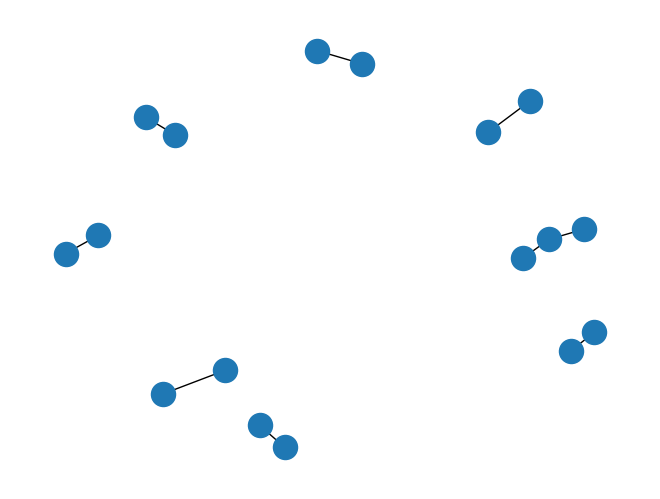

In [215]:
nx.draw(min_tree)

In [75]:

min_cost = sys.maxsize

total = 0

def link_helper(row, array_choice):
    global array_cost, min_cost, best_choice, total

    if row >= len(array_cost):
        cost = np.sum(array_cost * array_choice)
       
        for k in range(len(array_choice)):
            if array_choice[k, :].sum() == 0: cost += 5
        for k in range(len(array_choice[0])):
            if array_choice[:, k].sum() == 0: cost += 5

        if cost < min_cost:
            min_cost = cost
            best_choice = array_choice.copy()
        return
    
    indices = np.where(array_cost[row] != -1)[0]

    for k in range(row):
         if array_choice[k, :].sum() > 1:
            indice_k = np.where(array_cost[k] != -1)[0]
            indices = np.setdiff1d(indices, indice_k)

    link_subhelper(row, array_choice, indices, 0)


def link_subhelper(row, array_choice, possible_index, index):
    if len(possible_index) == 0:
        link_helper(row + 1, array_choice)
    elif index == len(possible_index) -1:
        if array_choice[row, :].sum() == 0:
            array_choice[row][possible_index[index]] = 1
            link_helper(row+1, array_choice)
        else:
            array_choice[row][possible_index[index]] = 0
            link_helper(row+1, array_choice)
    else:
        array_choice[row][possible_index[index]] = 0
        link_subhelper(row, array_choice, possible_index, index + 1)
        array_choice[row][possible_index[index]] = 1
        link_subhelper(row, array_choice, possible_index, index + 1)



link_helper(0, array_choice)


In [76]:
total

24001

In [72]:
len(composer.cells_frame_dict[20])

62

In [82]:
arr = []

for row in range(len(array_cost)):
    arr.append(len(np.where(array_cost[row] != -1)[0]))

In [83]:
np.mean(arr)

1.4838709677419355

In [86]:
1.9 ** 60

5.311486196497163e+16

In [85]:
1.4838 ** 30

138439.8124761383

In [42]:
min_cost

0.40942476532859284

In [56]:
best_choice

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0

In [31]:
best_choice[:, i].sum() == 0

True

In [10]:
best_choice[i, :].sum()

0.0

In [67]:
len(array_cost) * len(array_cost[0])

961

In [49]:
indices = np.where(array_cost[i] != -1)[0]

In [50]:
indices

array([29])

In [41]:
np.shape(array_cost[2:])

(28, 30)

In [42]:
array_cost

array([[ 0.16041979, -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        ,  0.10476472, -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        ,  0.11212397, -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1

In [25]:
array_cost * -1

array([[-0.08139535, -1.        , -1.        , -1.        , -5.        ],
       [-1.        , -0.11724138, -1.        , -0.99907236, -5.        ],
       [-1.        , -1.        , -0.12852113, -1.        , -5.        ],
       [-1.        , -1.        , -1.        , -0.08226691, -5.        ],
       [-5.        , -5.        , -5.        , -5.        , -5.        ]])